In [51]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
os.chdir('/home/javak/phasenet_chile-subduction-zone')
PROJECT_ROOT = os.getcwd()

In [52]:
# Load events catalog
os.chdir('/home/javak/Sample_data_chile')
CATALOG_ROOT = os.getcwd()
catalog_txt = pd.read_csv(os.path.join(CATALOG_ROOT, "Events_catalog/IPOC_2007_2020_picks.txt"), sep="\t")
export_fig_path ='/home/javak/Sample_data_chile/Comparing PhaseNet and Catalog'

In [110]:
import pickle


with open(os.path.join(export_fig_path, "result_PhaseNet.pkl"),'rb') as fp:
    PhaseNet_result = pickle.load(fp)

PhaseNet_result= PhaseNet_result[PhaseNet_result['stream'].map(lambda d: len(d)) > 0]
tr = PhaseNet_result.stream[11]
tr
#tr[0].stats.endtime
PhaseNet_result


network_station_PN = PhaseNet_result.index.to_series().str.split(".").str[:2].str.join(".")
PhaseNet_result['network_station'] = network_station_PN
PhaseNet_result.index[0]


'CX.PB18..HH.D.2020.366'

In [101]:
import pickle

dt=7000
with open(os.path.join(export_fig_path, "events.pkl"),'rb') as fp:
    events = pickle.load(fp)
events

'''
for i in range(0, events.shape[0]):
    print(i)
    tr = PhaseNet_result.stream[i]
    
    mask_picks_time = (events['picks_time']> tr[0].stats.starttime) & (events['picks_time']<tr[0].stats.starttime+dt)

#new_df_p_waves = df_p_waves.loc[mask_p]
#new_df_s_waves = df_s_waves.loc[mask_s]
'''

events['network_station']=events['network_code'].astype(str)+'.'+events['station_code']
events

,picks_time,picks_uncertainty,network_code,station_code,phase_hint,origins_time,origins_longitude,origins_latitude,magnitudes,network_station
0,2012-01-01T00:13:12.880000Z,0.02,CX,PB11,P,2012-01-01T00:12:53.260000Z,-69.2627,-20.5713,2.2,CX.PB11
1,2012-01-01T00:13:17.180000Z,0.02,CX,PB07,P,2012-01-01T00:12:53.260000Z,-69.2627,-20.5713,2.2,CX.PB07
2,2012-01-01T00:13:27.470000Z,0.04,CX,PB12,P,2012-01-01T00:12:53.260000Z,-69.2627,-20.5713,2.2,CX.PB12
3,2012-01-01T00:13:13.750000Z,0.03,CX,PB02,P,2012-01-01T00:12:53.260000Z,-69.2627,-20.5713,2.2,CX.PB02
4,2012-01-01T00:13:28.610000Z,0.09,CX,PB02,S,2012-01-01T00:12:53.260000Z,-69.2627,-20.5713,2.2,CX.PB02
...,...,...,...,...,...,...,...,...,...,...
491,2012-01-01T21:38:33.580000Z,0.02,CX,PB08,P,2012-01-01T21:38:18.520000Z,-69.3099,-19.7552,2.1,CX.PB08
492,2012-01-01T21:38:45.210000Z,0.06,CX,PB08,S,2012-01-01T21:38:18.520000Z,-69.3099,-19.7552,2.1,CX.PB08
493,2012-01-01T21:38:35.880000Z,0.04,CX,MNMCX,P,2012-01-01T21:38:18.520000Z,-69.3099,-19.7552,2.1,CX.MNMCX
494,2012-01-01T21:38:48.260000Z,0.12,CX,MNMCX,S,2012-01-01T21:38:18.520000Z,-69.3099,-19.7552,2.1,CX.MNMCX


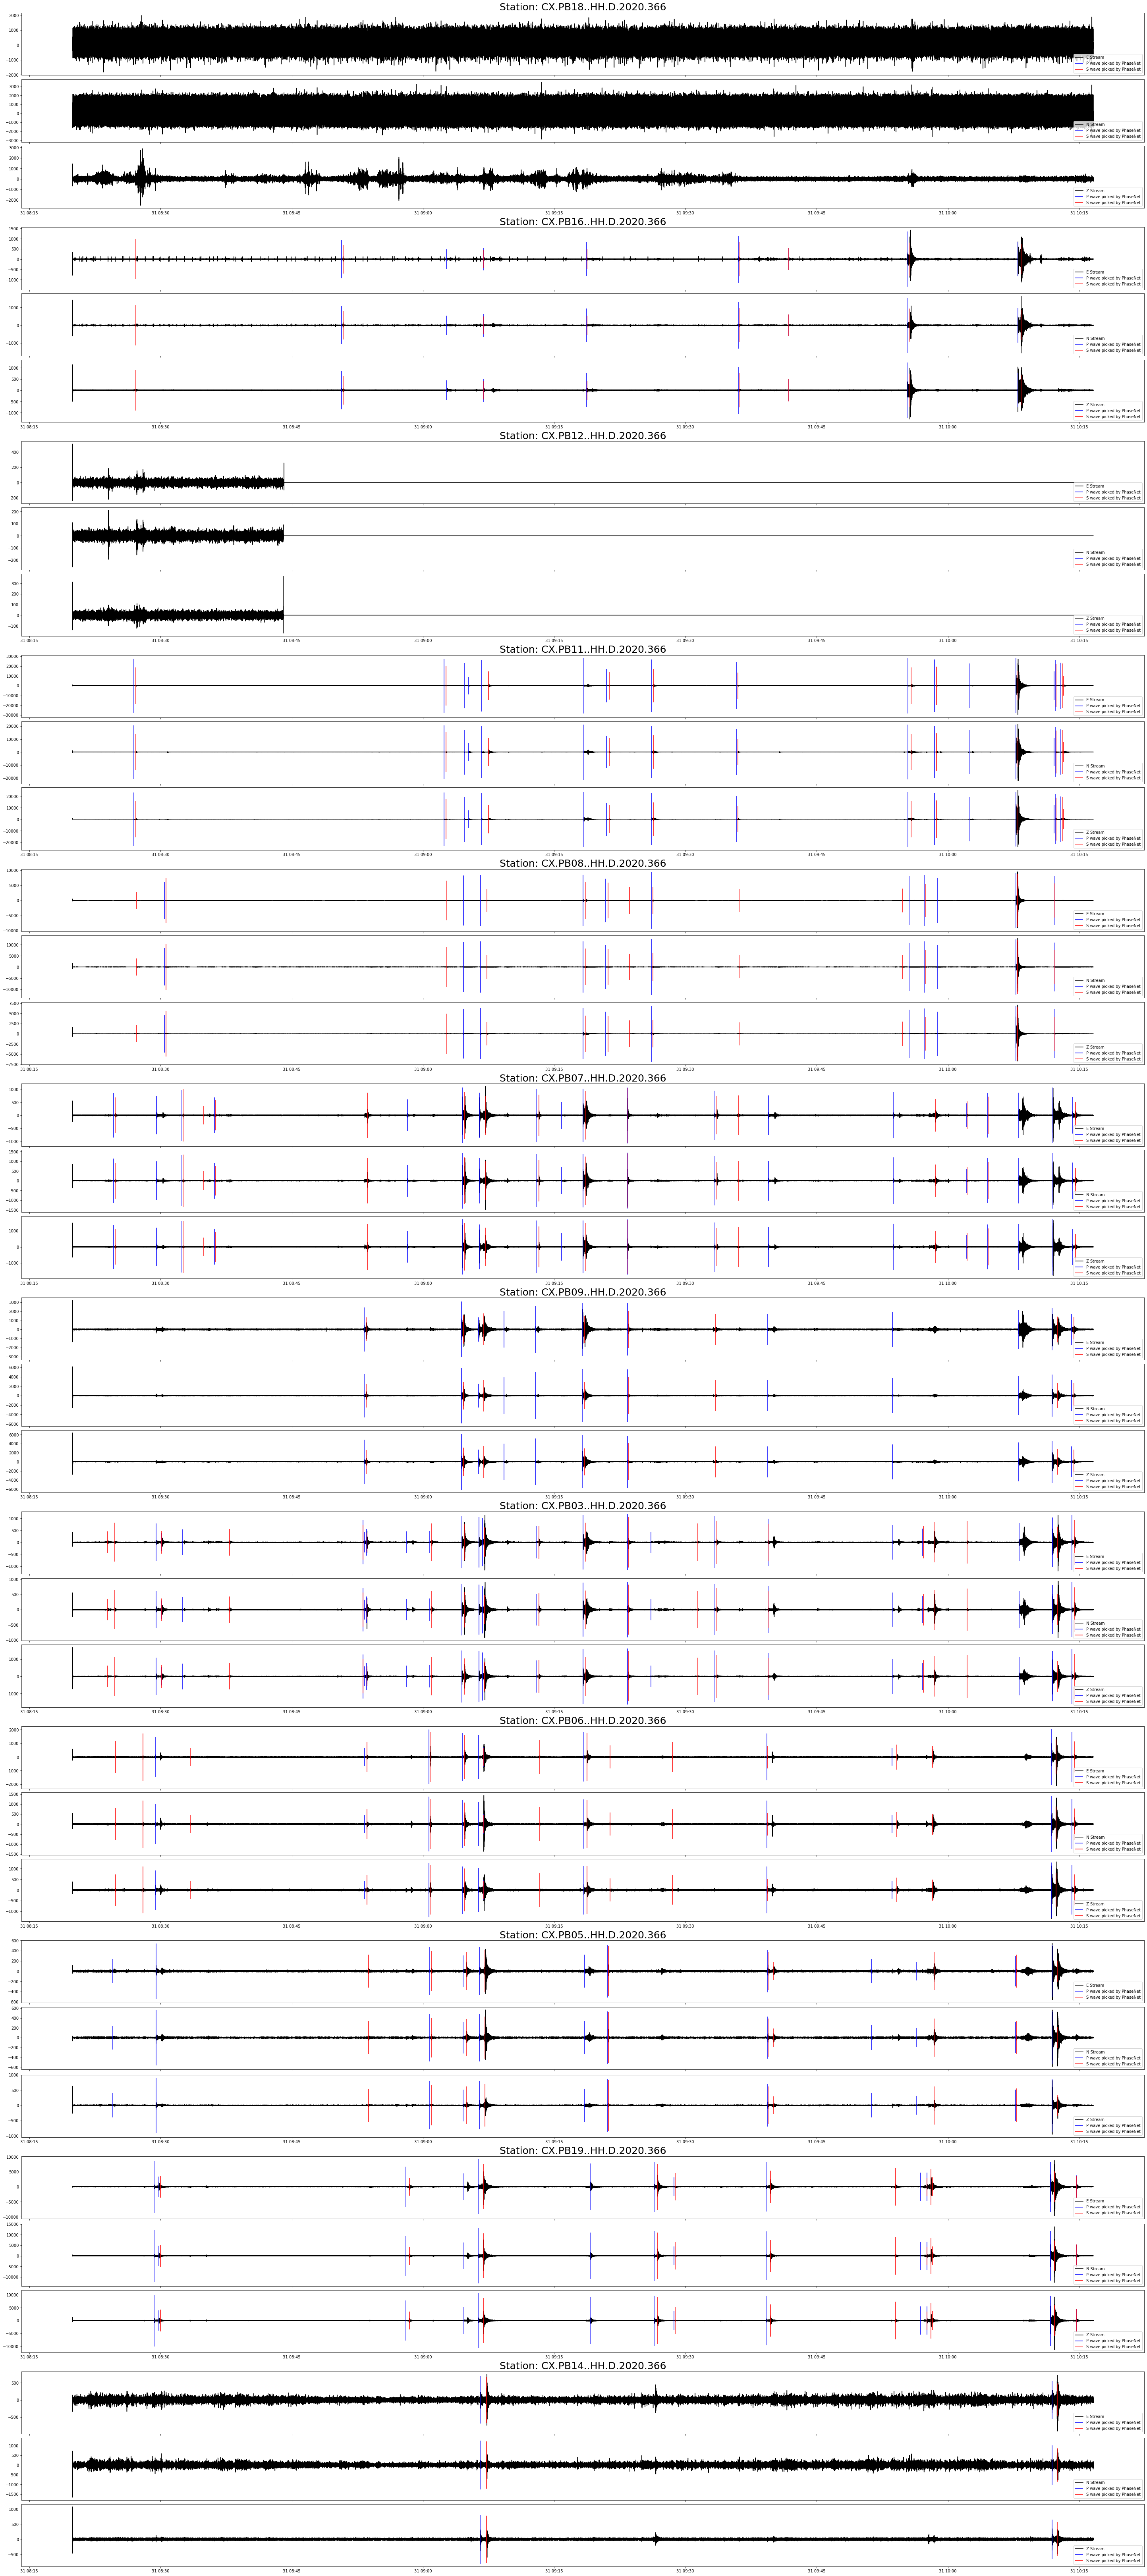

In [55]:
import datetime
import obspy
# plot
fig, ax = plt.subplots(PhaseNet_result.shape[0]*3,1,figsize=(40,90),constrained_layout = True)

for i in range (0,PhaseNet_result.shape[0]):
    ax[3*i].set_title(fontsize=25,label="Station: {}".format(PhaseNet_result.index[i]), fontdict=None, loc='center')
    times = PhaseNet_result.stream.iloc[i][0].times('matplotlib')
    ax[3*i].plot(PhaseNet_result.stream.iloc[i][0].times('matplotlib'), PhaseNet_result.stream.iloc[i][0].data, 
                markersize=1, label = 'E Stream', color = 'k')
    ax[3*i+1].plot(PhaseNet_result.stream.iloc[i][1].times('matplotlib'), PhaseNet_result.stream.iloc[i][1].data,
                markersize=1, label = 'N Stream', color = 'k')
    ax[3*i+2].plot(PhaseNet_result.stream.iloc[i][2].times('matplotlib'), PhaseNet_result.stream.iloc[i][2].data,
                markersize=1, label = 'Z Stream', color = 'k')

    
    plt.setp(ax[3*i].get_xticklabels(), visible=False)
    plt.setp(ax[3*i+1].get_xticklabels(), visible=False)
    

    # Draw P waves imported from PhaseNet
    ax[3*i].vlines([obspy.UTCDateTime(t).matplotlib_date for t in PhaseNet_result.P_waves[i]['timestamp']], 
        ymin = (-PhaseNet_result.stream.iloc[i][0].max()*np.array (PhaseNet_result.P_waves[i]['prob'])).tolist(),
        ymax = ( PhaseNet_result.stream.iloc[i][0].max()*np.array (PhaseNet_result.P_waves[i]['prob'])).tolist(),
        color='b', linestyle='solid', label = 'P wave picked by PhaseNet')
    ax[3*i].xaxis_date()

    ax[3*i+1].vlines([obspy.UTCDateTime(t).matplotlib_date for t in PhaseNet_result.P_waves[i]['timestamp']], 
        ymin = (-PhaseNet_result.stream.iloc[i][1].max()*np.array (PhaseNet_result.P_waves[i]['prob'])).tolist(),
        ymax = ( PhaseNet_result.stream.iloc[i][1].max()*np.array (PhaseNet_result.P_waves[i]['prob'])).tolist(),
        color='b', linestyle='solid', label = 'P wave picked by PhaseNet')
    ax[3*i+1].xaxis_date()

    ax[3*i+2].vlines([obspy.UTCDateTime(t).matplotlib_date for t in PhaseNet_result.P_waves[i]['timestamp']], 
        ymin = (-PhaseNet_result.stream.iloc[i][2].max()*np.array (PhaseNet_result.P_waves[i]['prob'])).tolist(),
        ymax = ( PhaseNet_result.stream.iloc[i][2].max()*np.array (PhaseNet_result.P_waves[i]['prob'])).tolist(),
        color='b', linestyle='solid', label = 'P wave picked by PhaseNet')
    ax[3*i+2].xaxis_date()


    
    # Draw S waves imported from PhaseNet
    ax[3*i].vlines([obspy.UTCDateTime(t).matplotlib_date for t in PhaseNet_result.S_waves[i]['timestamp']], 
        ymin = (-PhaseNet_result.stream.iloc[i][0].max()*np.array (PhaseNet_result.S_waves[i]['prob'])).tolist(),
        ymax = ( PhaseNet_result.stream.iloc[i][0].max()*np.array (PhaseNet_result.S_waves[i]['prob'])).tolist(),
        color='r', linestyle='solid', label = 'S wave picked by PhaseNet')
    ax[3*i].xaxis_date()

    ax[3*i+1].vlines([obspy.UTCDateTime(t).matplotlib_date for t in PhaseNet_result.S_waves[i]['timestamp']], 
        ymin = (-PhaseNet_result.stream.iloc[i][1].max()*np.array (PhaseNet_result.S_waves[i]['prob'])).tolist(),
        ymax = ( PhaseNet_result.stream.iloc[i][1].max()*np.array (PhaseNet_result.S_waves[i]['prob'])).tolist(),
        color='r', linestyle='solid', label = 'S wave picked by PhaseNet')
    ax[3*i+1].xaxis_date()

    ax[3*i+2].vlines([obspy.UTCDateTime(t).matplotlib_date for t in PhaseNet_result.S_waves[i]['timestamp']], 
        ymin = (-PhaseNet_result.stream.iloc[i][2].max()*np.array (PhaseNet_result.S_waves[i]['prob'])).tolist(),
        ymax = ( PhaseNet_result.stream.iloc[i][2].max()*np.array (PhaseNet_result.S_waves[i]['prob'])).tolist(),
        color='r', linestyle='solid', label = 'S wave picked by PhaseNet')
    ax[3*i+2].xaxis_date()

    ax[3*i].legend(loc='lower right')
    ax[3*i+1].legend(loc='lower right')
    ax[3*i+2].legend(loc='lower right')
file_name = '{0}.{extention}'.format('PhaseNet_result', extention='png')
fig.savefig(os.path.join(export_fig_path, file_name), facecolor = 'w')

